# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Loading Datset

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Data/MLRFP9_Hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
df.shape

(119390, 32)

In [ ]:
df1=df.copy()

In [ ]:
# df1=df.replace(['company','country'],['other','other'])
df1['country']=df1['country'].fillna('other')
df1['agent']=df1['agent'].fillna(df1.agent.mean())
df1=df1.dropna()
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
for cl in df1.columns:
  if (df1[cl].dtype!=int) & (df1[cl].dtype!=float):
    print(cl,df1[cl].unique())

hotel ['Resort Hotel' 'City Hotel']
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'January' 'February'
 'March' 'April' 'May' 'June' 'December']
meal ['BB' 'HB' 'SC' 'FB' 'Undefined']
country ['FRA' 'PRT' 'CHE' 'IRL' 'ITA' 'SMR' 'GBR' 'DEU' 'AUT' 'ESP' 'BEL' 'CZE'
 'NLD' 'other' 'POL' 'ROU' 'CYP' 'NOR' 'USA' 'MEX' 'AUS' 'NZL' 'BRA' 'PRI'
 'JPN' 'FIN' 'CN' 'RUS' 'OMN' 'SUR' 'DNK' 'MAR' 'BGR' 'URY' 'IND' 'SRB'
 'SVN' 'COL' 'AGO' 'GRC' 'SWE' 'KOR' 'CHN' 'ARG' 'VEN' 'DZA' 'ZAF' 'TUR'
 'HRV' 'CHL' 'CRI' 'EST' 'MLT' 'SVK' 'ISL' 'ALB' 'LTU' 'LVA' 'MKD' 'LKA'
 'TWN' 'HUN' 'PAK' 'IRN' 'PER']
market_segment ['Corporate' 'Direct' 'Online TA' 'Groups' 'Offline TA/TO' 'Complementary'
 'Aviation']
distribution_channel ['Corporate' 'Direct' 'TA/TO' 'GDS']
reserved_room_type ['A' 'E' 'G' 'D' 'C' 'P' 'F' 'H' 'B']
assigned_room_type ['G' 'A' 'F' 'E' 'D' 'C' 'H' 'I' 'P' 'B' 'K']
deposit_type ['No Deposit' 'Refundable' 'Non Refund']
customer_type ['Transient' 'Group' 'Transient-Part

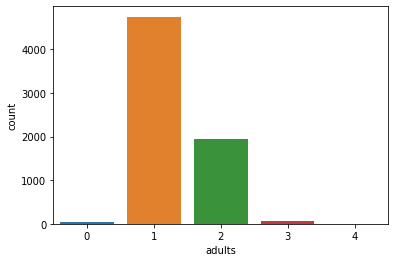

In [ ]:
sns.countplot(x=df1['adults'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


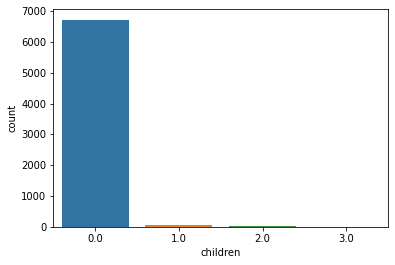

In [ ]:
sns.countplot(df1['children'])

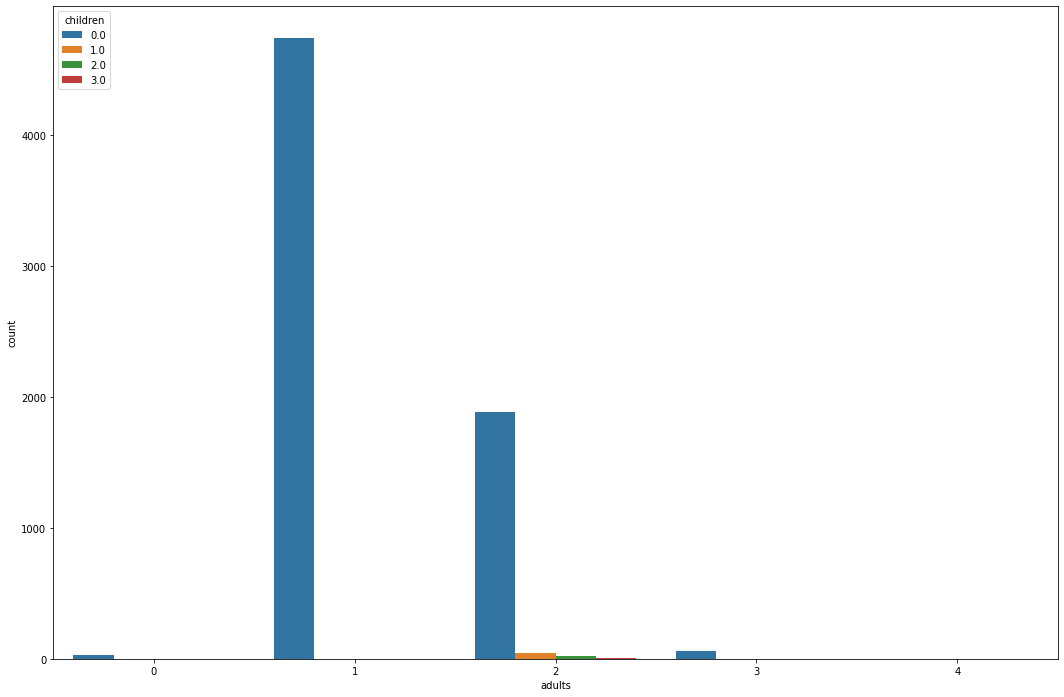

In [ ]:
plt.figure(figsize=(18,12))
sns.countplot(x=df1['adults'],hue=df1['children'])

In [ ]:
def ct(cc):
  plt.figure(figsize=(18,12))
  sns.countplot(cc,hue='is_canceled',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


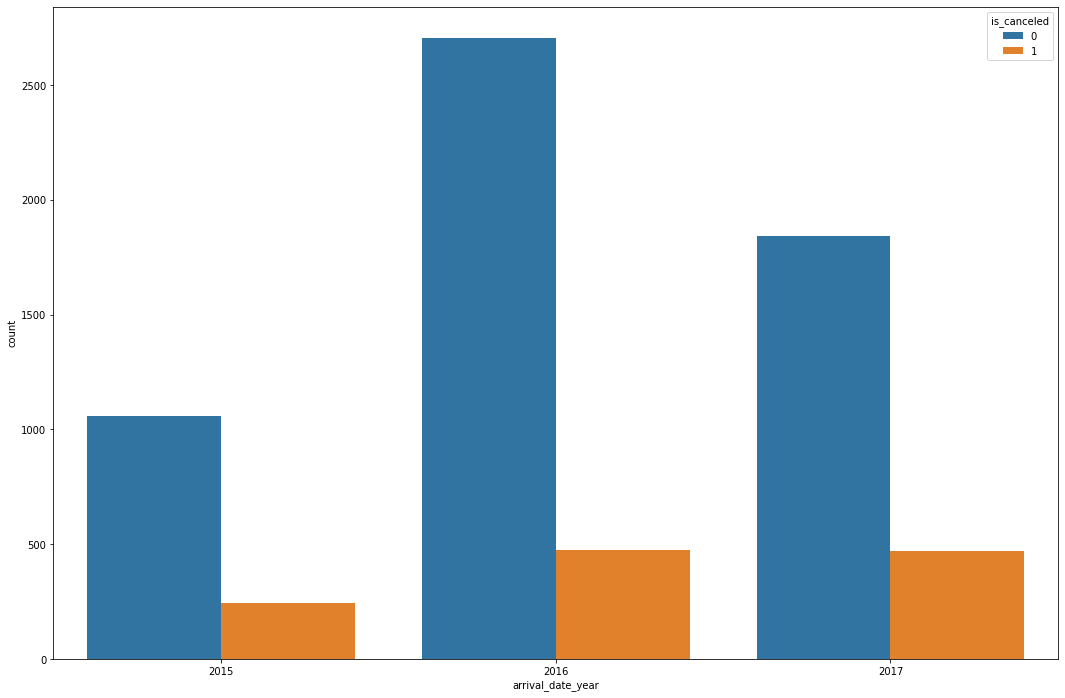

In [ ]:
ct('arrival_date_year')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


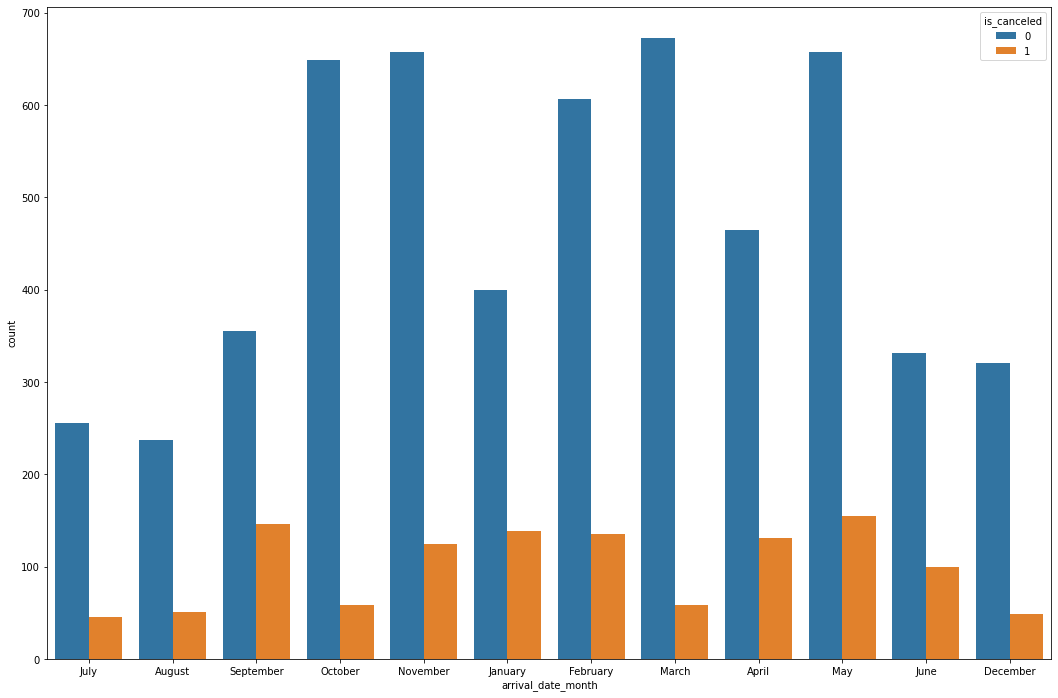

In [ ]:
ct('arrival_date_month')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


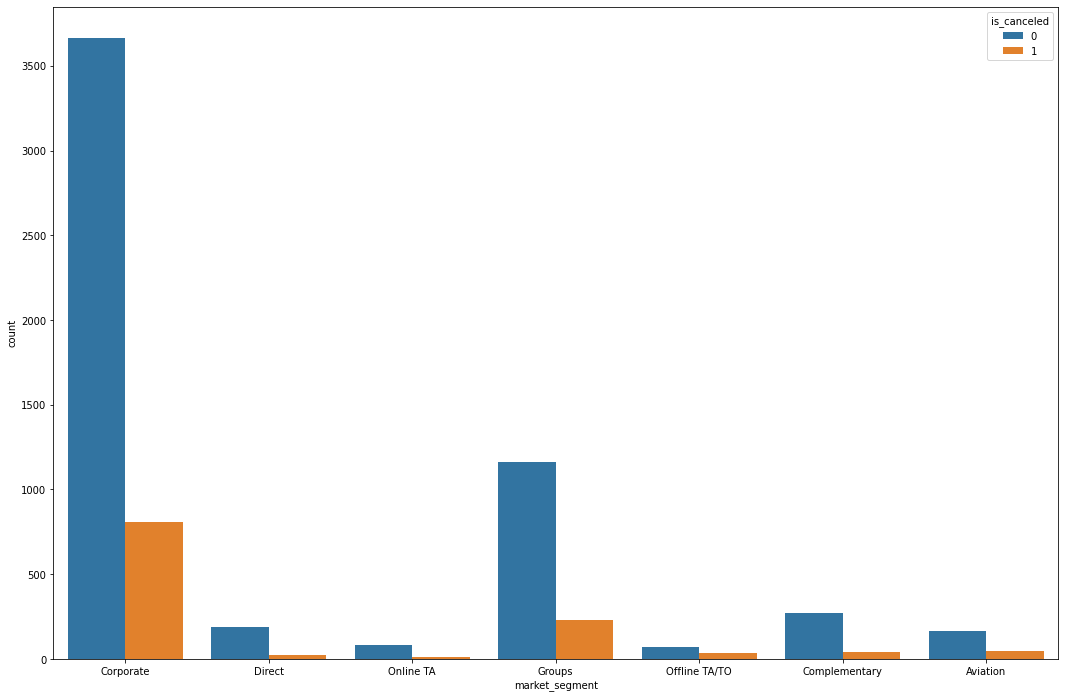

In [ ]:
ct('market_segment')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


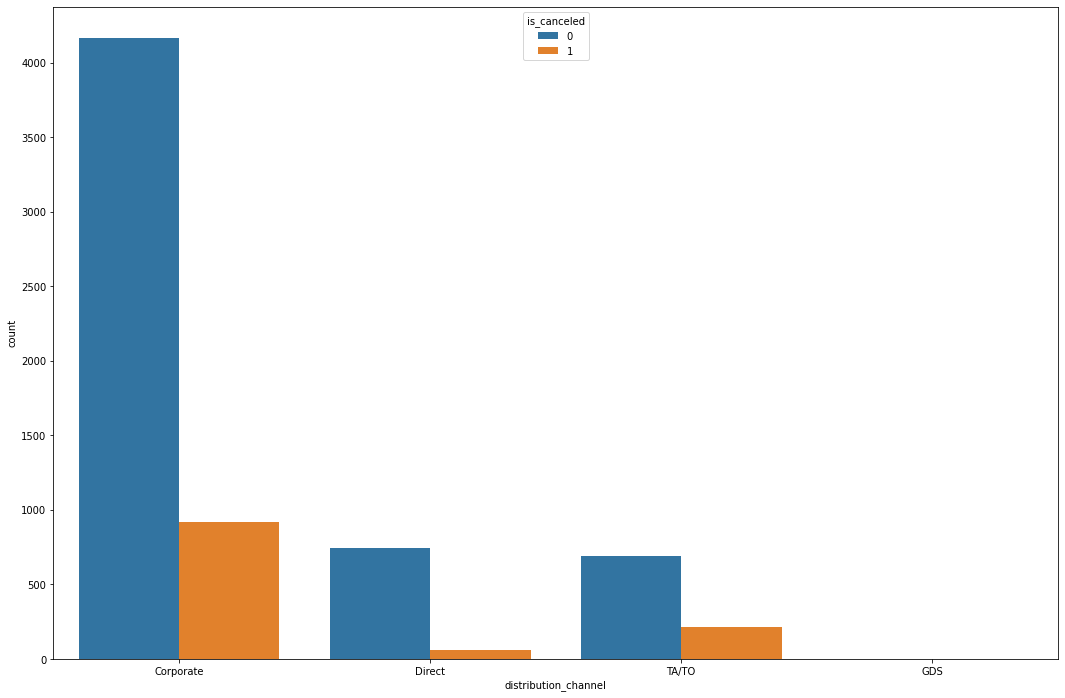

In [ ]:
ct('distribution_channel')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


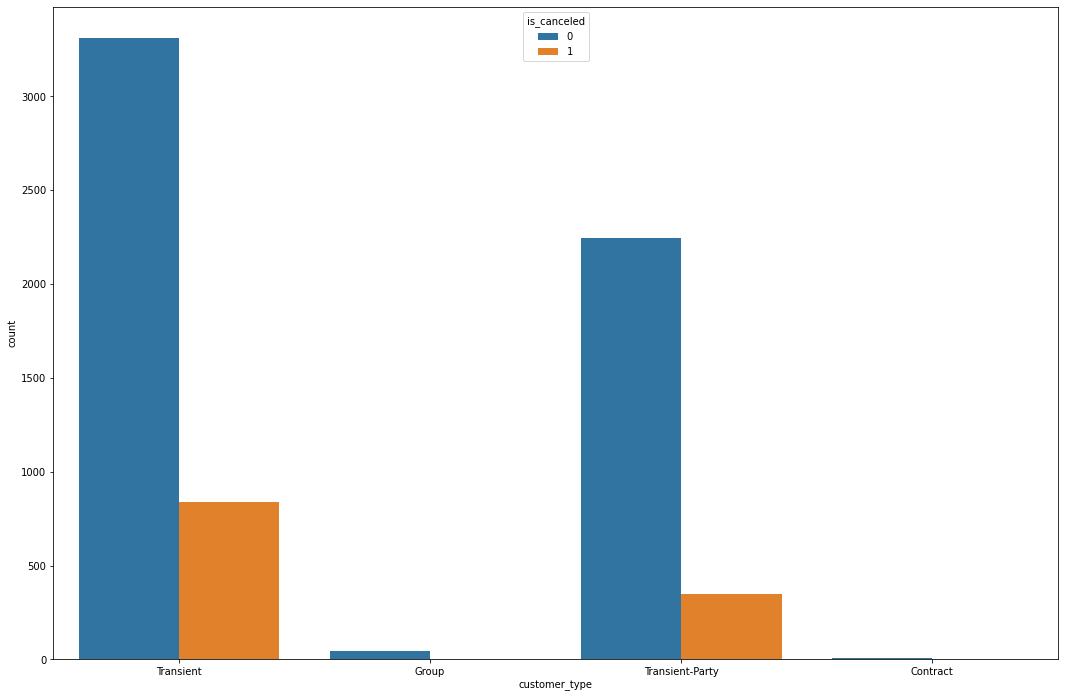

In [ ]:
ct('customer_type')

In [ ]:
df1.nunique()

hotel                               2
is_canceled                         2
lead_time                         198
arrival_date_year                   3
arrival_date_month                 12
arrival_date_week_number           53
arrival_date_day_of_month          31
stays_in_weekend_nights            10
stays_in_week_nights               22
adults                              5
children                            4
babies                              2
meal                                5
country                            65
market_segment                      7
distribution_channel                4
is_repeated_guest                   2
previous_cancellations              7
previous_bookings_not_canceled     72
reserved_room_type                  9
assigned_room_type                 11
booking_changes                    11
deposit_type                        3
agent                              29
company                           352
days_in_waiting_list               23
customer_typ

In [ ]:
df2=df1.drop(['reservation_status_date'],axis=1)
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,86.693382,110.0,0,Transient,107.42,0,0,Check-Out
218,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,86.693382,110.0,0,Transient,104.72,0,1,Canceled
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,86.693382,110.0,0,Transient,104.72,0,1,Canceled
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,0.0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,86.693382,110.0,0,Transient,104.72,1,1,Check-Out
295,Resort Hotel,0,84,2015,July,28,11,1,1,2,0.0,0,HB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,86.693382,113.0,0,Transient,100.00,1,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,City Hotel,0,40,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,0,No Deposit,86.693382,451.0,0,Transient,95.00,0,0,Check-Out
119122,City Hotel,0,40,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,0,No Deposit,86.693382,451.0,0,Transient,95.00,0,0,Check-Out
119123,City Hotel,0,40,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,0,No Deposit,86.693382,451.0,0,Transient,95.00,0,0,Check-Out
119124,City Hotel,0,0,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,0,0,0,A,A,0,No Deposit,86.693382,72.0,0,Transient,0.00,0,2,Check-Out


In [ ]:
enc_col=[]
for i in df2.columns:
  if (df1[i].dtype!=int) & (df1[i].dtype!=float):
    enc_col.append(i)

In [ ]:
enc_col

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for k in enc_col:
  df2[k]=le.fit_transform(df2[k])

In [ ]:
dfn=df2.copy()

In [ ]:
# dt=pd.get_dummies(df2['hotel'],drop_first=True)
# dfn=pd.concat([dfn,dt],axis=1)
# dfn

In [ ]:
# def enc():
#   dvl=pd.DataFrame()
#   dfn=df2.copy()
#   for k in enc_col:
#     dv=pd.get_dummies(df2[k],drop_first=True)
#     dvl=pd.concat([dvl,dv],axis=1)
#     dfn=dfn.drop([k],axis=1)
#   return dvl,dfn

In [ ]:
# dff=pd.concat([enc()[1],enc()[0]],axis=1)

In [ ]:
x=df2.drop(['is_canceled'],axis=1)
y=df2.is_canceled

In [ ]:
cs=pd.Series(x.columns)
from sklearn.tree import ExtraTreeClassifier
rg=ExtraTreeClassifier()
rg.fit(x,y)
fe=pd.DataFrame(rg.feature_importances_,columns=['imp'])
pd.concat([cs,fe],axis=1).nlargest(10,'imp')

,0,imp
29,reservation_status,0.467621
21,deposit_type,0.218651
26,adr,0.060844
12,country,0.044090
25,customer_type,0.033611
1,lead_time,0.027735
5,arrival_date_day_of_month,0.021722
19,assigned_room_type,0.014213
16,previous_cancellations,0.012509
13,market_segment,0.011571


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_test.shape

(2040, 30)

## Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = [DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,XGBRFClassifier,AdaBoostClassifier,SVC,GaussianNB]

for mod in model:
    reg = mod()
    reg = reg.fit(x_train,y_train)
    print(mod , 'accuracy',reg.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy 1.0
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy 0.8867647058823529
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy 0.9975490196078431
<class 'xgboost.sklearn.XGBRFClassifier'> accuracy 1.0
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> accuracy 1.0
<class 'sklearn.svm._classes.SVC'> accuracy 0.8112745098039216
<class 'sklearn.naive_bayes.GaussianNB'> accuracy 0.8470588235294118


In [ ]:
reg = RandomForestClassifier()
reg = reg.fit(x_train,y_train)
print('accuracy',reg.score(x_test,y_test))

accuracy 0.9985294117647059


In [ ]:
prd=reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,classification_report

In [ ]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1655
           1       1.00      1.00      1.00       385

    accuracy                           1.00      2040
   macro avg       1.00      1.00      1.00      2040
weighted avg       1.00      1.00      1.00      2040



In [ ]:
# from sklearn.model_selection import KFold,cross_val_score
# models = []
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('RF', RandomForestRegressor()))
# models.append(('XGB', XGBRFRegressor()))

# results = []
# names = []
# for name,model in models:
#     kfold = KFold(n_splits=10)
#     cv_result =cross_val_score(model,x_train,y_train,cv=kfold)
#     names.append(name)
#     results.append(cv_result)
# for i in range(len(names)):
#     print(names[i],results[i].mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9990196078431373

## Hyperparameter Tuning

In [ ]:
model=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### best parameter

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=15,n_estimators=700)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9985294117647059

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,accuracy_score

In [ ]:
def run_model(model):
    model.fit(x_train,y_train)
    prd = model.predict(x_test)
    accuracy = accuracy_score(y_test, prd)
    print("pricison_score: ",precision_score(y_test, prd))
    print("recall_score: ",recall_score(y_test, prd))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,prd,digits=5))
    print(confusion_matrix(y_test,prd))

In [ ]:
run_model(RandomForestClassifier())

pricison_score:  1.0
recall_score:  0.9922077922077922
Accuracy = 0.9985294117647059
              precision    recall  f1-score   support

           0    0.99819   1.00000   0.99909      1655
           1    1.00000   0.99221   0.99609       385

    accuracy                        0.99853      2040
   macro avg    0.99910   0.99610   0.99759      2040
weighted avg    0.99853   0.99853   0.99853      2040

[[1655    0]
 [   3  382]]
